In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [38]:
# Pre set values for max cols and chart size

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.rcParams["figure.figsize"] = (15,5)

In [110]:
# Read training data

data=pd.read_csv('train_values.csv')
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Read table with target variable 

label=pd.read_csv('train_labels.csv')
label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [112]:
# Add Target variable to training data 

data['damage']=label['damage_grade']
data.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258477 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               258477 non-null int64
geo_level_1_id                            258477 non-null int64
geo_level_2_id                            258477 non-null int64
geo_level_3_id                            258477 non-null int64
count_floors_pre_eq                       258477 non-null int64
age                                       258477 non-null int64
area_percentage                           258477 non-null int64
height_percentage                         258477 non-null int64
land_surface_condition                    258477 non-null object
foundation_type                           258477 non-null object
roof_type                                 258477 non-null object
ground_floor_type                         258477 non-null object
other_floor_type                          258477 non-null object
position                                  258477 non

Looks like there are no missing values! 

In [139]:
# data.sample().melt()

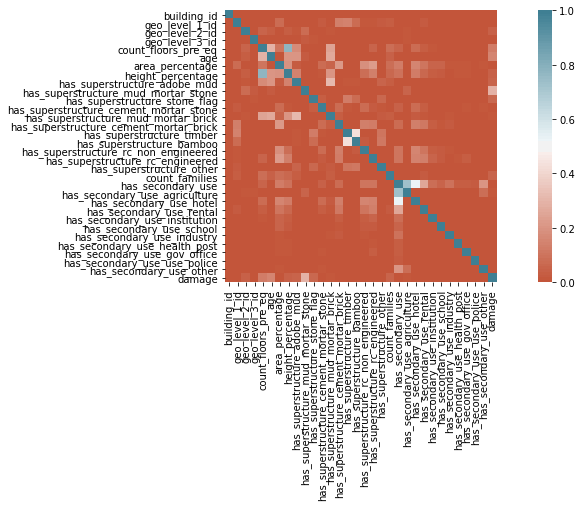

In [140]:
# Check correlation of all the columns to see if something stands-out explicitly

corr=data.corr()
sns.heatmap(corr, xticklabels=True,yticklabels=True,  vmin=0, vmax=1,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True)

- There are not a lot of correlated fields. 
- has_secondary_use is correlated with it's sub_parts and  
- height_percentage is highly correlated with count_floors_pre_eq
- area_percentage and height_percentage are correlated with has_super_structure features and seconday use of buildings.


The training dataset can be divided into following sections.

- demographic info- count of families, legal ownership 
- building location and area info
- buiding construction inf0- land surfacre condition, foundation type, roof type, ground floor type, other floor type, postion,
- plan configuration
- building structure information
- Secondary use info

In [116]:
#  pp.ProfileReport(data)

- Age: Zero=10%. Could be missing data or newer building , less than a year old.

- count_families: Zero=8%, Are these non-residential building? 

- geo_level_1_id: Zero=1.5%, Investigate these records

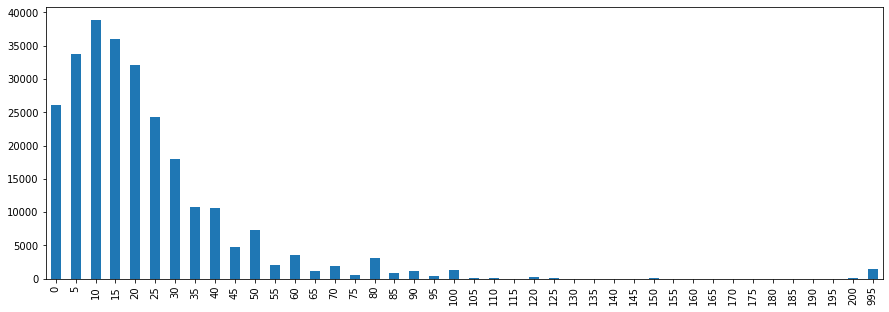

In [118]:
data['age'].value_counts().sort_index().plot.bar(figsize=[15,5])

There are a significant no. of building with Zero age. These are either newer construction (less than an year old) or the data is missing for these buildings.

In [119]:
filt=data['age']==0
data[filt].head()


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
22,219578,10,90,11215,2,0,6,5,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
36,864809,13,305,5956,2,0,9,8,t,r,q,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
37,252816,17,303,4121,3,0,10,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


Nothing stands out clearly so far for Zero age buildings. Probably they are just newer construction.

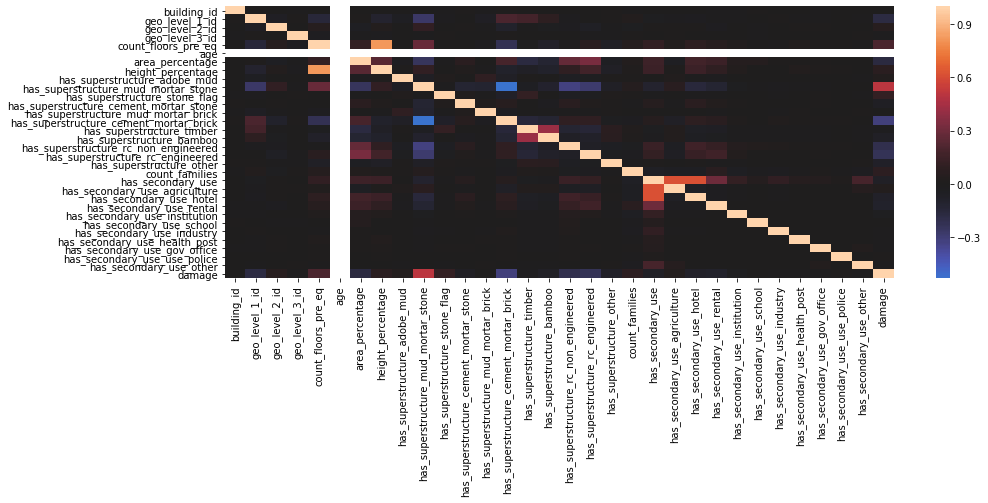

In [120]:
# Correlation heatmap for newer buildings

corr=data[filt].corr()
sns.heatmap(corr, xticklabels=True,yticklabels=True,center=0)


In [14]:
# data.loc[filt,'has_secondary_use'].value_counts()

In [121]:
data['geo_level_1_id'].unique()

array([ 6,  8, 21, 22, 11,  9, 20,  0, 26, 17, 12, 18,  4, 27, 25, 10,  7,
        3, 13, 30, 16,  5, 15, 14, 19,  1, 24, 28, 23,  2, 29],
      dtype=int64)

###### Let's analyse effect of age on the damage caused to the buidings


In [122]:
# There are few outlier buildings older than 100 years. Remove them from training data
filt=data['age']<=100
data=data[filt]

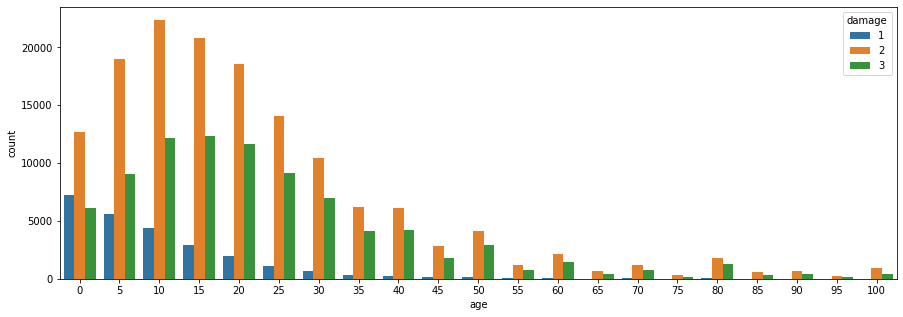

In [148]:
cols=['damage','age']

damageByAge=data.groupby(['age','damage' ]).agg({'building_id':'count'}).reset_index().rename(columns={'building_id':'count'})

sns.barplot(x='age',y='count',data=damageByAge,hue='damage')

It is evident that medium grade damage is the common type of damage. 
It is interesting to notice that only buildings less than a year old have lesser grade 3 damage than grade 1. 

Lets analyze buildings of age 50 and 10.

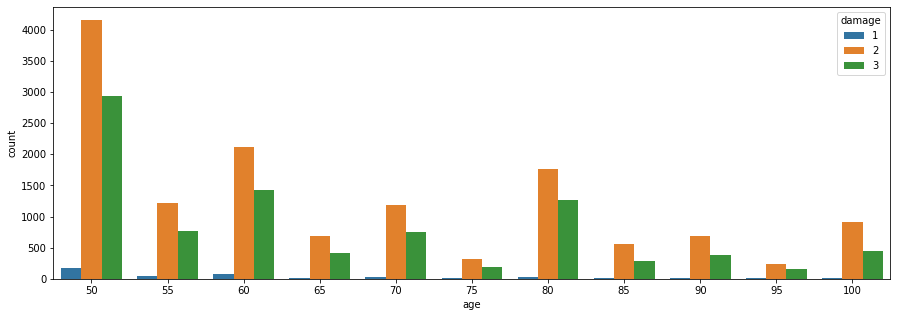

In [149]:
filt=damageByAge['age']>=50
sns.barplot(x='age',y='count',data=damageByAge[filt],hue='damage')


Older buildings could not tolerate the wrath of nature and bore medium to high damage.

#### Count_Families
8% of the  total records have Zero count_families.

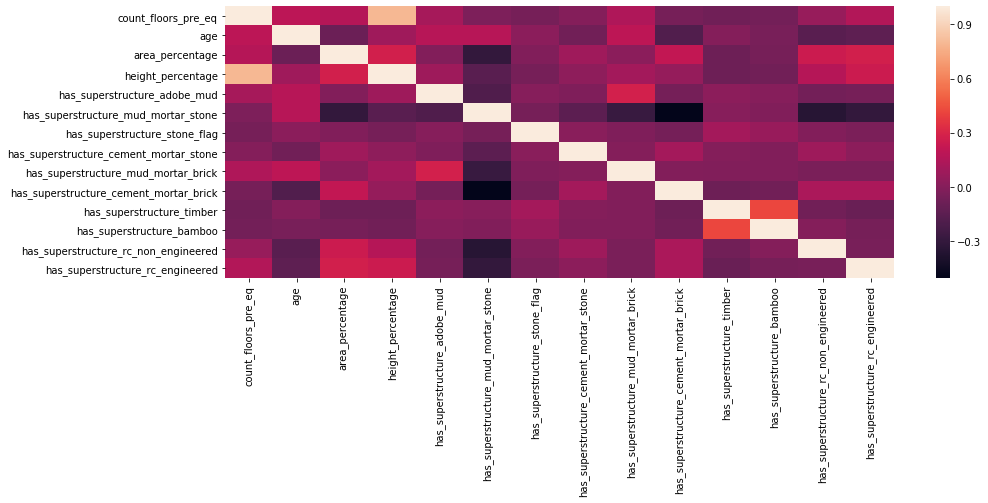

In [150]:
filt=data['count_families']==0
# data.loc[filt,'has_secondary_use'].value_counts()

corr=data.loc[filt,'count_floors_pre_eq':'has_superstructure_rc_engineered'].corr()
sns.heatmap(corr,xticklabels=True, yticklabels=True)

##### Let's explore impact of building material on the damage caused.


In [129]:
# list of structure related colmns
cols=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other']

# melt the columns
datamelt=data.melt(id_vars=['age','damage'],value_vars=cols).rename(columns={'variable':'structure','value':'count'})

# Group by age, damage and structure
damageByStructure=datamelt.groupby(['damage','structure']).agg({'count':'sum'})

# sns.barplot(x='age',y='count',data=damageByStructure, hue='damage')
damageByStructure.reset_index(inplace=True)


In [130]:
damageByStructure.sort_values(by='count', ascending=False,inplace=True)

Text(0, 0.5, 'count')

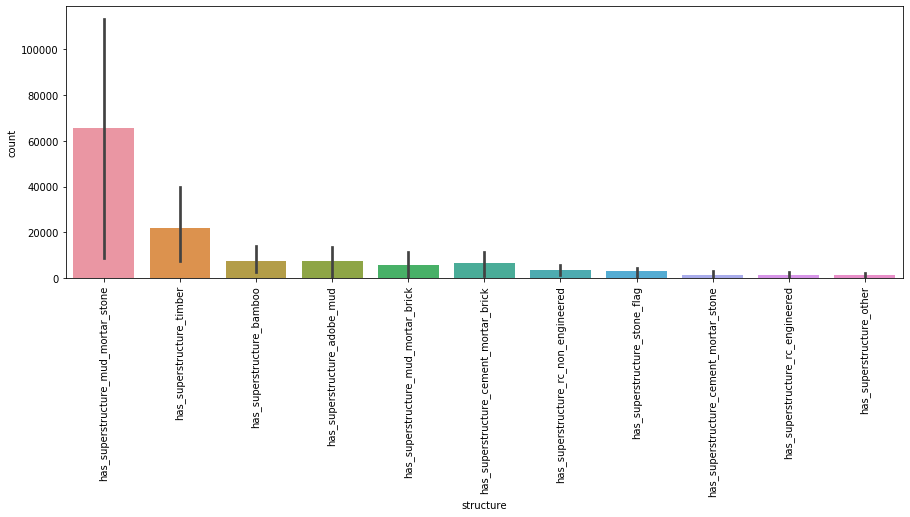

In [131]:
sns.barplot(x='structure',y='count',data=damageByStructure)
plt.xticks(rotation=90)
plt.ylabel('count')


Top 5 types of structures those got damaged the most were made up of  timber, bamboo and some form of mud.

stone_flag, cement_mortar_stone and rc_engineered type were affected the least. This show that these buildings either withheld the earthquake well or they were far away from the epicenter.



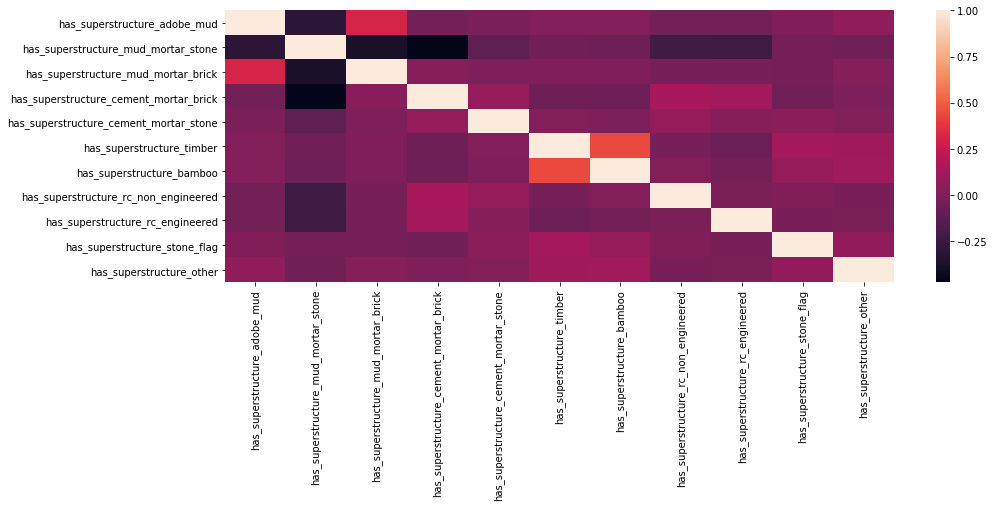

In [132]:
cols=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_mud_mortar_brick',       
      'has_superstructure_cement_mortar_brick',   
      'has_superstructure_cement_mortar_stone',
       
       'has_superstructure_timber',
       'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',
      'has_superstructure_stone_flag',
       'has_superstructure_other']

sns.heatmap(data[cols].corr())

Bambo and timbe are correlated so one of them can be dropped before feeding the data into the ML model.

First 4 columns are negatively correlated

No. 1 and 3 are positively correlated  so one of them can be dropped as well.



##### Foundation Type

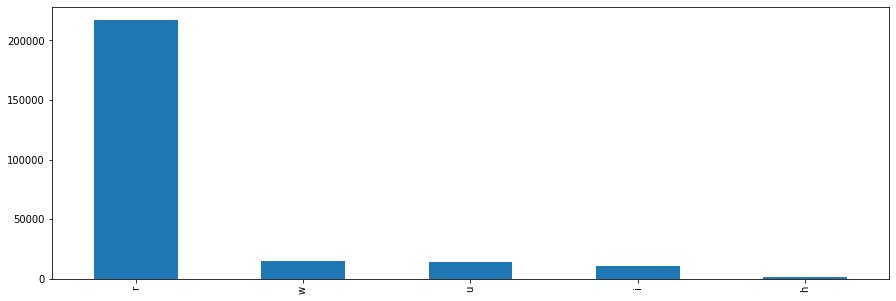

In [151]:
cols=['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration',]
data['foundation_type'].value_counts().plot.bar()


'r' type of foundation is the leading cause.

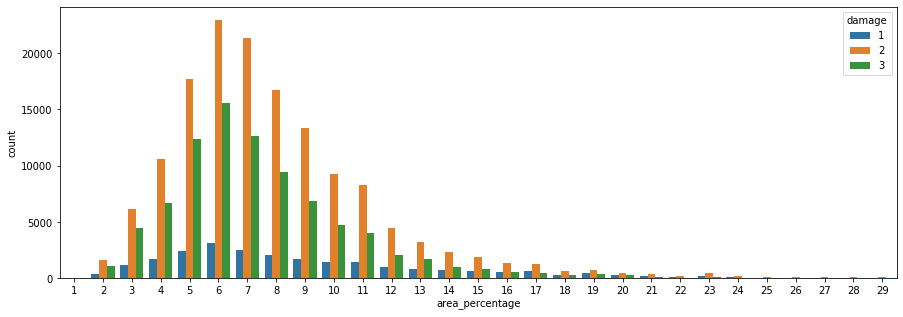

In [152]:
sns.countplot(x='area_percentage',data=data[data['area_percentage']<30], hue='damage')